In [4]:
import xuleta as xu
import numpy as np
import pylab as plt
from matplotlib import cm
from glob import glob

In [5]:
f = '/media/denis/seagate/PB/regressions/'

In [6]:
def createstack(images,nodata=-9999):
    arrays = []
    for i in glob(images):
        a,m = xu.TifToArray(i)
        arrays.append(a)
        arrays2 = np.dstack(arrays)
        arrays2 = np.where(arrays2==nodata,np.nan,arrays2)
    return arrays2

In [7]:
sgpp = np.nansum(createstack(f+'albedo_wet/s_*.tif'),axis=2)
rgpp = np.nansum(createstack(f+'albedo_wet/r_*.tif'),axis=2)

rgpp = np.where(rgpp<0.25,np.nan,1)
sgpp = np.where(sgpp<0,np.nan,sgpp)

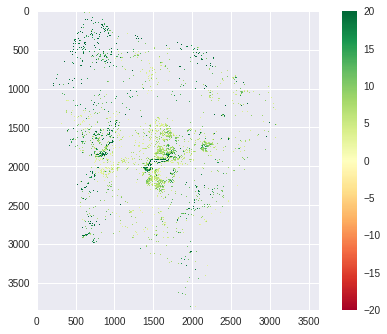

In [8]:
plt.imshow(rgpp*sgpp,cmap='RdYlGn')
plt.clim(-20,20)
plt.colorbar()

plt.show()

In [9]:
x = rgpp*sgpp

pixels = np.count_nonzero(~np.isnan(x))/4 #em km2

areat = 1554291 #km2

pixels,(pixels/areat)*100

(100125.5, 6.441876070825862)

### with the datasets all summed

In [28]:
rg,m = xu.TifToArray(f + '/gpp/r0311_all.tif')
sg,m = xu.TifToArray(f + '/gpp/s0311_all.tif')

rg = np.where(rg<0.25,np.nan,1) #GPP = 0.3

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


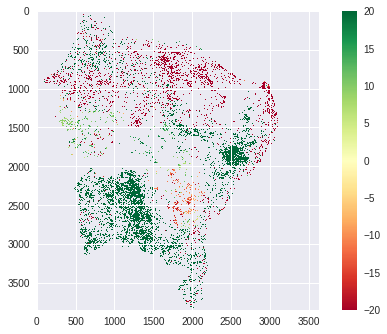

In [87]:
plt.imshow(rg*sg,cmap='RdYlGn')
plt.colorbar()

plt.show()

In [30]:
xu.ArrayToTif(Array=rg*sg,Folder=f,Filename='/gpp/slope_masked_0311.tif',Metadata=m,Type=3)

/gpp/slope_masked_0311.tif saved.
 


### Calculate overlaps

In [99]:
g,m = xu.TifToArray(f+'/gpp/slope_masked_0311.tif')
gt = np.where(g!=np.nan,1,np.nan)
#gt = np.where(g<-100,np.nan,1)
a,m = xu.TifToArray(f+'/albedo_wet/slope_masked_0311.tif')



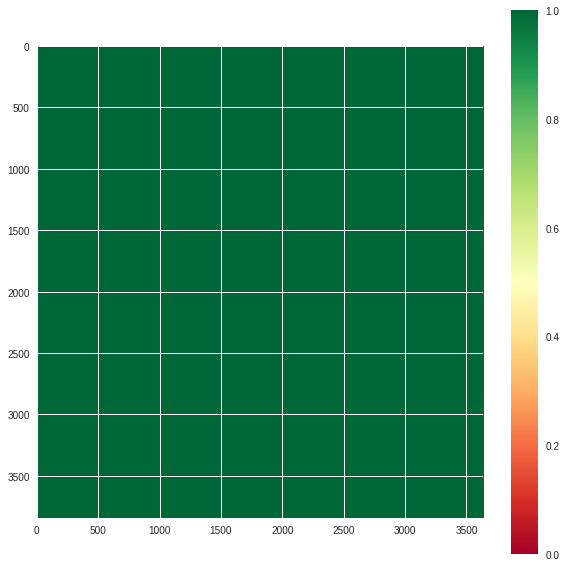

In [100]:
plt.figure(figsize=(10,10))
plt.imshow(gt,cmap='RdYlGn')
plt.colorbar()
plt.clim(0,1)
plt.show()

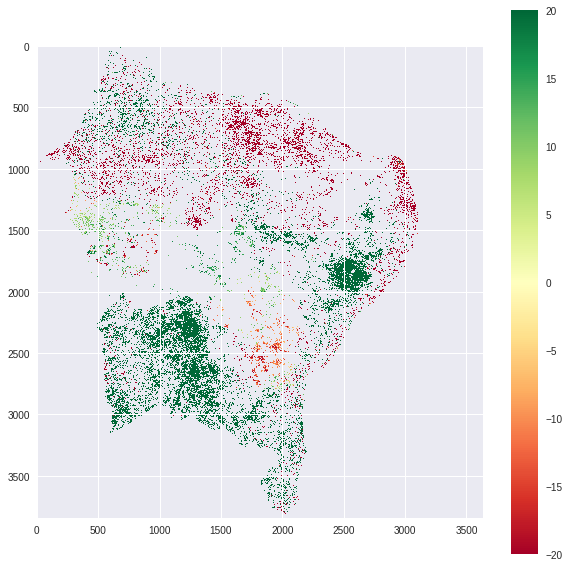

In [88]:
plt.figure(figsize=(10,10))
plt.imshow(g,cmap='RdYlGn')
plt.colorbar()
plt.clim(-20,20)
plt.show()


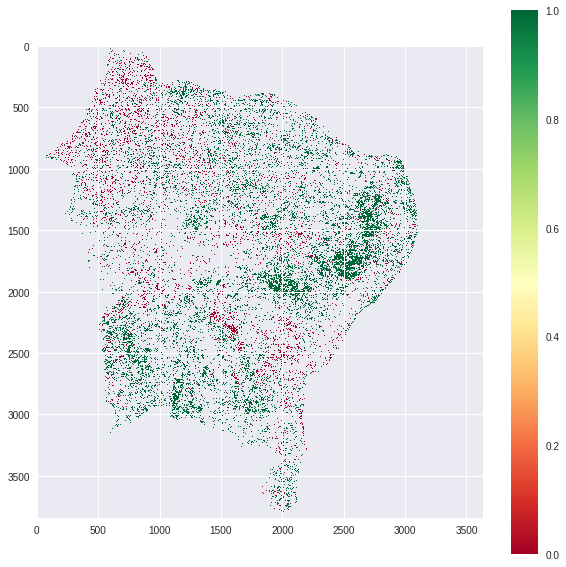

In [92]:
plt.figure(figsize=(10,10))
plt.imshow(-a,cmap='RdYlGn')
plt.colorbar()
plt.clim(0,1)
plt.show()

In [82]:
xu.ArrayToTif(tudo,Folder=f,Filename='tudo.tif',Metadata=m,Type=3)

tudo.tif saved.
 
